# TSAI Assignment 7 - Code 8

### Model8:
###### Target
Improve accuracy - Use Antman and GAP, use LROnPlateau
###### Result
Model Parameters - 4,838
Train Accuracy - 99.32%
Test accuracy - 99.21%%
##### Analysis
Way better in terms of validation accracy. However, model tends to converge at 99.24. Still unable to reach 99.4%


In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 8

In [5]:
from models import model_8
myNextModel = model_8.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=3, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step(tst_acc[0])

Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_8.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=0.0963 Batch_id=117 Accuracy=89.07: 100%|████████████████████████████████| 118/118 [01:58<00:00,  1.00s/it]


Test set: Average loss: 0.1320, Accuracy: 9540/10000 (95.40%)

Epoch 2


Train: Loss=0.0273 Batch_id=117 Accuracy=97.70: 100%|████████████████████████████████| 118/118 [00:18<00:00,  6.43it/s]


Test set: Average loss: 0.0567, Accuracy: 9810/10000 (98.10%)

Epoch 3


Train: Loss=0.0923 Batch_id=117 Accuracy=98.18: 100%|████████████████████████████████| 118/118 [00:11<00:00, 10.70it/s]


Test set: Average loss: 0.0547, Accuracy: 9824/10000 (98.24%)

Epoch 4


Train: Loss=0.0759 Batch_id=117 Accuracy=98.45: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.68it/s]


Test set: Average loss: 0.0497, Accuracy: 9838/10000 (98.38%)

Epoch 5


Train: Loss=0.0593 Batch_id=117 Accuracy=98.64: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.18it/s]


Test set: Average loss: 0.0404, Accuracy: 9871/10000 (98.71%)

Epoch 00005: reducing learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0368 Batch_id=117 Accuracy=98.98: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.11it/s]


Test set: Average loss: 0.0375, Accuracy: 9872/10000 (98.72%)

Epoch 7


Train: Loss=0.0387 Batch_id=117 Accuracy=99.03: 100%|████████████████████████████████| 118/118 [00:10<00:00, 10.78it/s]


Test set: Average loss: 0.0327, Accuracy: 9880/10000 (98.80%)

Epoch 8


Train: Loss=0.0155 Batch_id=117 Accuracy=99.14: 100%|████████████████████████████████| 118/118 [00:10<00:00, 11.78it/s]


Test set: Average loss: 0.0298, Accuracy: 9904/10000 (99.04%)

Epoch 9


Train: Loss=0.0032 Batch_id=117 Accuracy=99.12: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.45it/s]


Test set: Average loss: 0.0327, Accuracy: 9894/10000 (98.94%)

Epoch 00009: reducing learning rate of group 0 to 2.5000e-02.
Epoch 10


Train: Loss=0.0155 Batch_id=117 Accuracy=99.25: 100%|████████████████████████████████| 118/118 [00:10<00:00, 11.24it/s]


Test set: Average loss: 0.0287, Accuracy: 9907/10000 (99.07%)

Epoch 11


Train: Loss=0.0143 Batch_id=117 Accuracy=99.26: 100%|████████████████████████████████| 118/118 [00:09<00:00, 11.80it/s]


Test set: Average loss: 0.0281, Accuracy: 9908/10000 (99.08%)

Epoch 12


Train: Loss=0.0102 Batch_id=117 Accuracy=99.29: 100%|████████████████████████████████| 118/118 [00:10<00:00, 11.43it/s]


Test set: Average loss: 0.0285, Accuracy: 9900/10000 (99.00%)

Epoch 13


Train: Loss=0.0743 Batch_id=117 Accuracy=99.27: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.69it/s]


Test set: Average loss: 0.0291, Accuracy: 9908/10000 (99.08%)

Epoch 00013: reducing learning rate of group 0 to 1.2500e-02.
Epoch 14


Train: Loss=0.0319 Batch_id=117 Accuracy=99.32: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.21it/s]


Test set: Average loss: 0.0275, Accuracy: 9904/10000 (99.04%)

Epoch 15


Train: Loss=0.0372 Batch_id=117 Accuracy=99.39: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.76it/s]


Test set: Average loss: 0.0269, Accuracy: 9914/10000 (99.14%)

Epoch 16


Train: Loss=0.0184 Batch_id=117 Accuracy=99.36: 100%|████████████████████████████████| 118/118 [00:10<00:00, 11.44it/s]


Test set: Average loss: 0.0274, Accuracy: 9912/10000 (99.12%)

Epoch 17


Train: Loss=0.0434 Batch_id=117 Accuracy=99.43: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.57it/s]


Test set: Average loss: 0.0270, Accuracy: 9911/10000 (99.11%)

Epoch 00017: reducing learning rate of group 0 to 6.2500e-03.
Epoch 18


Train: Loss=0.0228 Batch_id=117 Accuracy=99.43: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.60it/s]


Test set: Average loss: 0.0272, Accuracy: 9910/10000 (99.10%)

Epoch 19


Train: Loss=0.0340 Batch_id=117 Accuracy=99.42: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.68it/s]


Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.11%)

Epoch 20


Train: Loss=0.0316 Batch_id=117 Accuracy=99.42: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.42it/s]


Test set: Average loss: 0.0274, Accuracy: 9910/10000 (99.10%)



Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 4, 24, 24]             148
              ReLU-6            [-1, 4, 24, 24]               0
       BatchNorm2d-7            [-1, 4, 24, 24]               8
           Dropout-8            [-1, 4, 24, 24]               0
         MaxPool2d-9            [-1, 4, 12, 12]               0
           Conv2d-10            [-1, 8, 10, 10]             296
             ReLU-11            [-1, 8, 10, 10]               0
      BatchNorm2d-12            [-1, 8, 10, 10]              16
          Dropout-13            [-1, 8, 10, 10]               0
           Conv2d-14              [-1, 

Plot the train and test accuracy

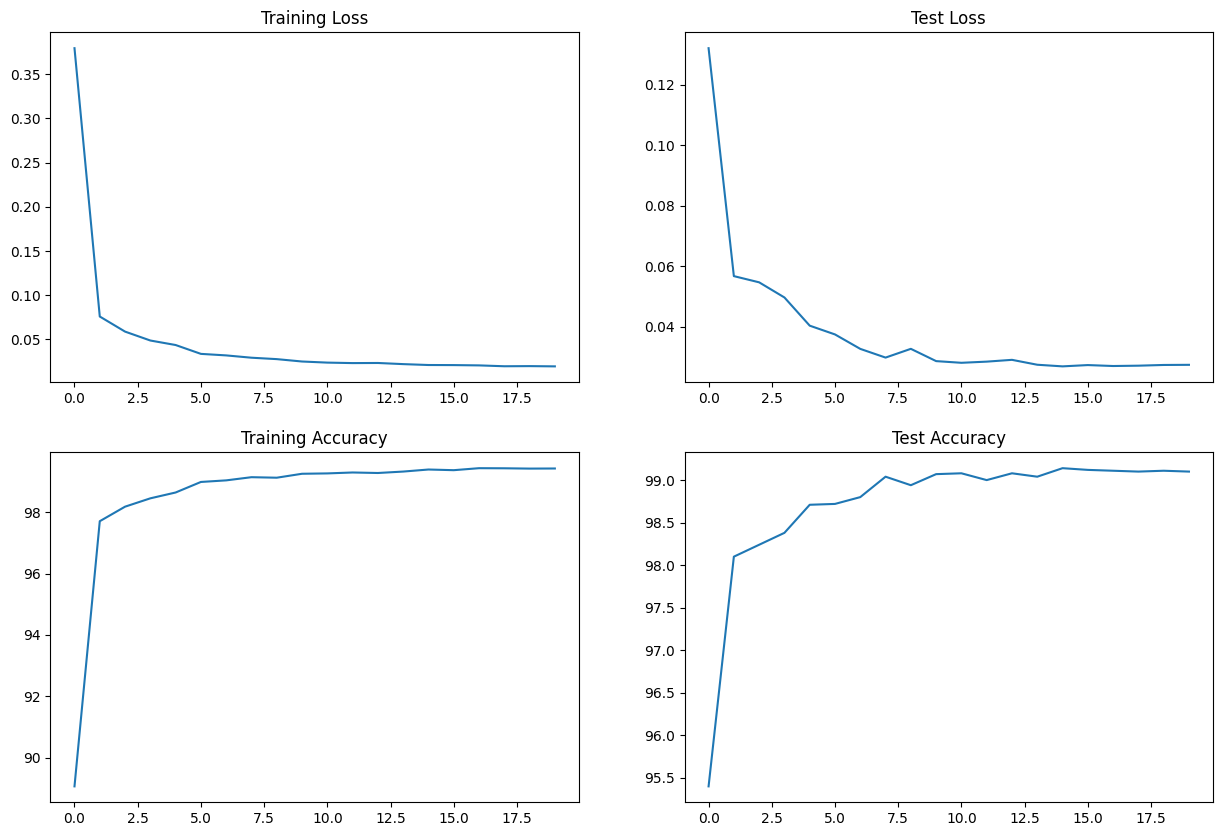

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)